# Physics 404/604

## Computational Physics 

# HOMEWORK

In [40]:
# Homework

# Undergraduate student:
# A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method
# and plot height (z) vs time (t).


#Graduate student:
# Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import subprocess
import os
import shutil
import pandas as pd
import matplotlib.animation as animation
import time
import pylab as pl
from IPython import display
import seaborn as sns
import cv2
from scipy import interpolate
from os import listdir
from os.path import isfile, join
from IPython.display import display, Markdown
import multiprocessing
from multiprocessing import Pool, freeze_support, cpu_count
import math
#from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import matplotlib.collections as mcol
import matplotlib.legend_handler
import re
import glob
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

#import athena_rad
import pickle
from matplotlib.collections import LineCollection
import seaborn as sns

In [2]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 27
mpl.rcParams['ytick.labelsize'] = 27

mpl.rcParams['xtick.major.size'] = 18 #+2 from previous
mpl.rcParams['xtick.minor.size'] = 12 #+4 from previous
mpl.rcParams['ytick.major.size'] = 18 #+4 from previous
mpl.rcParams['ytick.minor.size'] = 12 #+4 from previous

mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['axes.grid.which'] = 'minor'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5

mpl.rcParams['legend.fontsize'] = 22

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

np.set_printoptions(precision=3)

## Undergraduate

In [3]:
''' C O N S T A N T S '''
# Mass of Hydrogen (grams)
mH = 1.6735575*10**-24
# Mean particle mass (grams)
mu = 2.33
# Gamma
gamma = 1.4
# Boltzmann constant (erg K-1)
kB = 1.380649*10**-16
# Gravitational constant (dyn cm2 g-2)
G = 6.67430*10**-8
# Mass of star (grams per solar mass)
M_sol = 1.98847*10**33
# AU to cm
AU = 1.4959787069100*10**13
# seconds in a year
yr = 3.155693*10**7 # seconds
# Mass of Earth (grams per Earth mass)
M_earth = 5.97237*10**27
# Stefan-Boltzman constant
sig_sb = 5.6704*10**-5 #erg cm-2 s-1 K-4 
# Solar radius
R_sol = 6.957*10**10 #cm
# Stefan-Boltzmann constant
#sb = 5.67*10**-8 #W m-2 K-4
sb = 5.67*10**-5 #erg cm-2 s-1 K-4
# Earth's radius
R_earth = 6.378*10**8 #cm

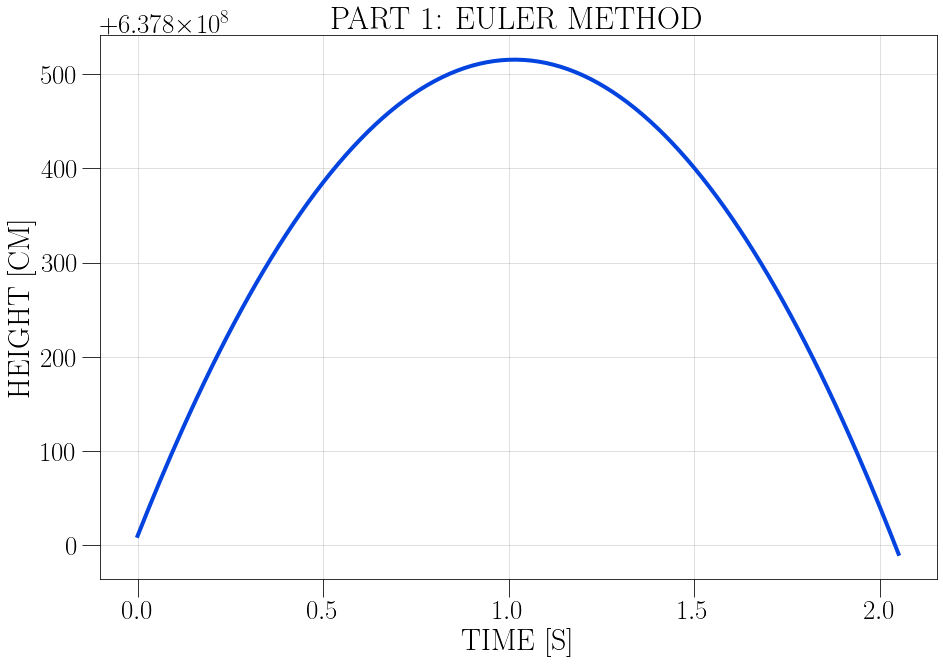

In [5]:
"""EULER METHOD"""

"""From the equations of gravitational attraction we have: y[0]=y, y[1]=v_{y}"""

M = M_earth
tend = 10. #we assume 10 seconds is more than enough time
h = 0.01
t = 0.
y0 = R_earth #cm
v0 = 1000. #cm s-1
y=[y0,v0] #initial conditions

def f(t, y):
    f=np.zeros(2)
    f[0] = y[1]
    f[1] = -(G*M/y[0]/y[0])
    return f
    
def eu(t, h, y):
    y = h*f(t,y) + y
    return y

# List of results
y_eu=[]
v_eu=[]
t_eu=[]
while(t<tend):
    # Condition: Hit time limit
    if t + h > tend:
        h=tend-t
        
    y = eu(t,h,y)
    y_eu =np.append(y_eu,y[0])
    v_eu = np.append(v_eu,y[1])
    t_eu = np.append(t_eu,t)
    t = t + h
    
    # Condition: Object hits the floor
    if y_eu[-1] < R_earth:
        break

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)

ax.grid(b=True, which='both')
ax.set_xlabel(r'TIME [S]')
ax.set_ylabel(r'HEIGHT [CM]')
ax.set_title(r'PART 1: EULER METHOD')

ax.plot(t_eu,y_eu,color="xkcd:blue",linestyle='-',linewidth=4,alpha=1.0)

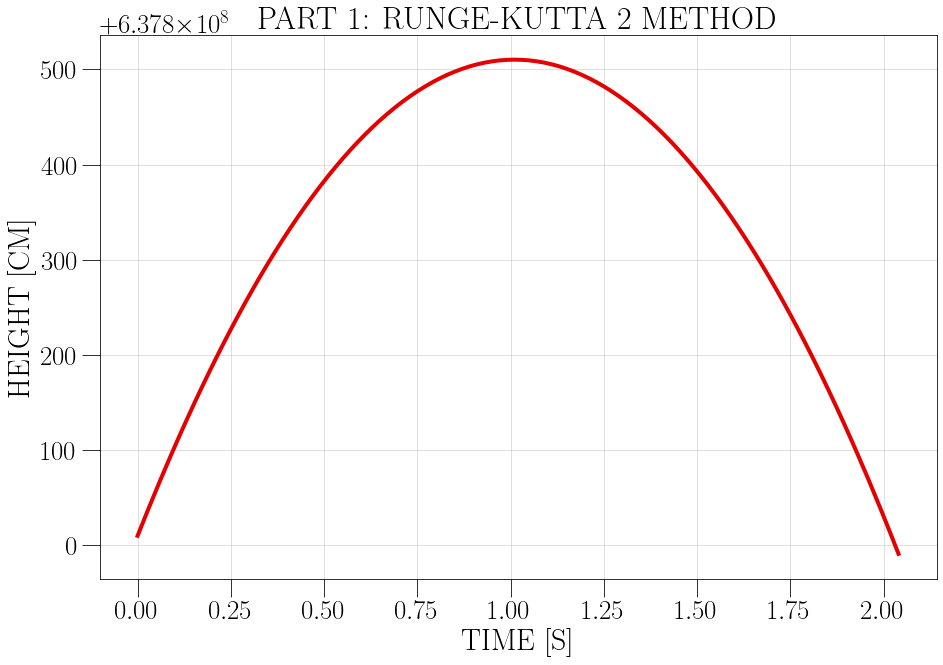

In [7]:
"""RUNGE-KUTTA FOR 2 METHOD"""

"""Again, from the equations of gravitational attraction we have: y[0]=y, y[1]=v_{y}"""

M = M_earth
tend = 10. #we assume 10 seconds is more than enough time
h = 0.01
t = 0.
y0 = R_earth #cm
v0 = 1000. #cm s-1
y=[y0,v0] #initial conditions

def f(t, y):
    f=np.zeros(2)
    f[0] = y[1]
    f[1] = -(G*M/y[0]/y[0])
    return f
    
def rk2(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    y+=k2
    return y

# List with different names to avoid confusion
y_rk=[]
v_rk=[]
t_rk=[]
while(t<tend):
    if t + h > tend:
        h=tend-t
        
    y = rk2(t,h,y,2)
    y_rk=np.append(y_rk,y[0])
    v_rk=np.append(v_rk,y[1])
    t_rk=np.append(t_rk,t)
    t = t+h
    
    if y_rk[-1] < R_earth:
        break
        

fig1 = plt.figure(figsize = (15,10))
ax = fig1.add_subplot(1,1,1)

ax.grid(b=True, which='both')
ax.set_xlabel(r'TIME [S]')
ax.set_ylabel(r'HEIGHT [CM]')
ax.set_title(r'PART 1: RUNGE-KUTTA 2 METHOD')

ax.plot(t_rk,y_rk,color="xkcd:red",linestyle='-',linewidth=4,alpha=1.0)

## Graduate

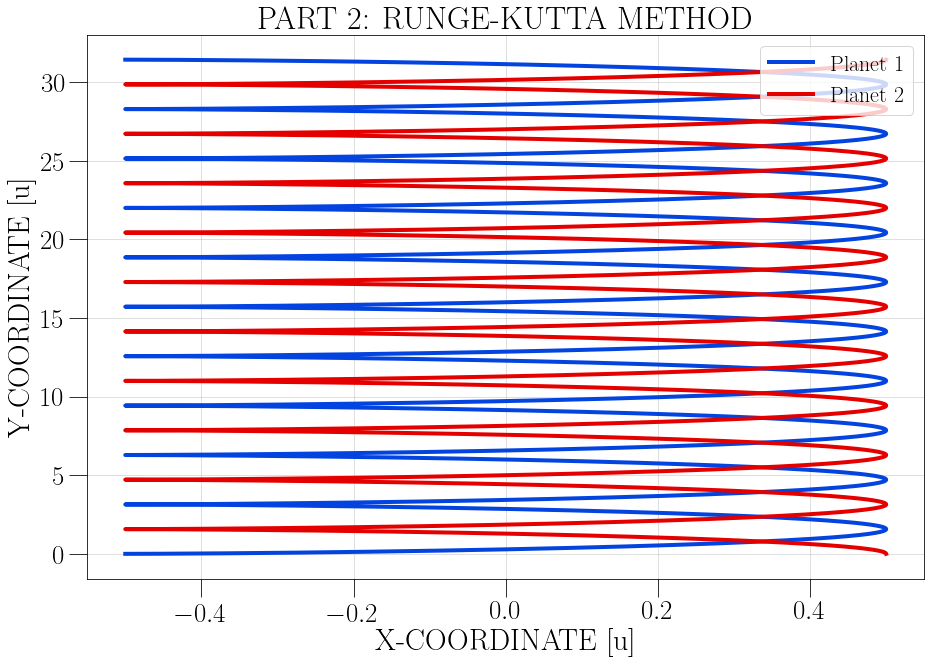

In [35]:
"""RUNGE-KUTTA"""

"""The masses M1 and M2 are comparable so the coordinates of both masses need to be addresed separately"""
"""Considering only the XY-plane we end up with eight variables and eight first order ODEs"""
"""We have: y[0]=x1, y[1]=y1, y[2]=x2, y[3]=y2, y[4]=vx1, y[5]=vy1, y[6]=vx2, y[7]=vy2"""

M1 = 1./G
M2 = 1./G
h = 0.001
t = 0.

# Initial conditions

# Position
x1_0 = -0.5
y1_0 = 0.
x2_0 = 0.5
y2_0 = 0.

# Period
r_0 = np.sqrt((x2_0-x1_0)**2 + (y2_0-y1_0)**2)
T = np.sqrt(4*np.pi*np.pi*r_0*r_0*r_0/G/(M1+M2))
tend = T*10 # 10 orbits


# Velocities
vx1_0 = 0.
vy1_0 = 0.
vx2_0 = 0.
vy2_0 = np.sqrt(2.)

y = [x1_0,y1_0,x2_0,y2_0,vx1_0,vy1_0,vx2_0,vy2_0] #initial conditions
n = len(y)


def f(t, y):
    r = np.sqrt((y[2]-y[0])**2 + (y[3]-y[1])**2)
    f=np.zeros(8)
    # Derivatives of positions
    f[0] = y[4]
    f[1] = y[5]
    f[2] = y[6]
    f[3] = y[7]
    
    # Derivatives of velocities
    f[4] = (G*M2/r/r/r)*(y[2]-y[0])
    f[5] = (G*M2/r/r/r)*(y[3]-y[1])
    f[6] = (G*M1/r/r/r)*(y[0]-y[2])
    f[7] = (G*M1/r/r/r)*(y[1]-y[3])
    
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

# List with different names to avoid confusion
x1 = []
y1 = []
x2 = []
y2 = []
vx1 = []
vy1 = []
vx2 = []
vy2 = []
t_list = []
while(t < tend):
    if t + h > tend:
        h = tend - t
        
    y = rk4(t,h,y,n)
    x1 = np.append(x1,y[0])
    y1 = np.append(y1,y[1])
    x2 = np.append(x2,y[2])
    y2 = np.append(y2,y[3])
    vx1 = np.append(vx1,y[4])
    vy1 = np.append(vy1,y[5])
    vx2 = np.append(vx2,y[6])
    vy2 = np.append(vy2,y[7])
    t_list = np.append(t_list,t)
    t = t+h
    
fig1 = plt.figure(figsize = (15,10))
ax = fig1.add_subplot(1,1,1)

ax.grid(b=True, which='both')
ax.set_xlabel(r'X-COORDINATE [u]')
ax.set_ylabel(r'Y-COORDINATE [u]')
ax.set_title(r'PART 2: RUNGE-KUTTA METHOD')

ax.plot(x1,y1,color="xkcd:blue",linestyle='-',linewidth=4,alpha=1.0,label="Planet 1")
ax.plot(x2,y2,color="xkcd:red",linestyle='-',linewidth=4,alpha=1.0,label="Planet 2")
ax.legend(loc='upper right')

Planets orbit around the center of mass (COM), which has its own velocity relative to the inertial frame (dependant to the choice of initial conditions). To see the orbits relative to the COM (which is how we typically visualize the planets of the Solar System moving around the Sun), we need to remove the COM's motion.

In [36]:
# Getting the center of mass (COM)
r1 = np.array([x1,y1])
r2 = np.array([x2,y2])
rg = ((M1*r1)+(M2*r2))/(M1+M2)

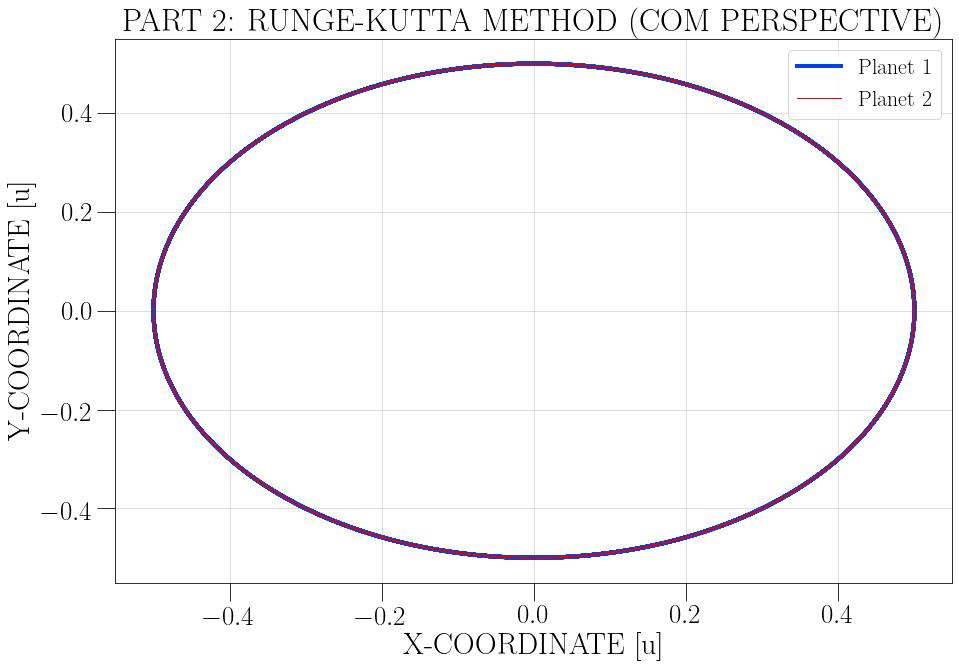

In [39]:
fig1 = plt.figure(figsize = (15,10))
ax = fig1.add_subplot(1,1,1)

ax.grid(b=True, which='both')
ax.set_xlabel(r'X-COORDINATE [u]')
ax.set_ylabel(r'Y-COORDINATE [u]')
ax.set_title(r'PART 2: RUNGE-KUTTA METHOD (COM PERSPECTIVE)')

ax.plot(r1[0]-rg[0],r1[1]-rg[1],color="xkcd:blue",linestyle='-',linewidth=4,alpha=1.0,label="Planet 1")
ax.plot(r2[0]-rg[0],r2[1]-rg[1],color="xkcd:red",linestyle='-',linewidth=1,alpha=1.0,label="Planet 2")
ax.legend(loc='upper right')

For the case of planets of the same mass, according to the COM's perspective, the orbits of both planets trace themselves on top of each other.

## Legendre Polynomials

Runge Kutta fot solving the problems. Bisection for finding the boundary conditions.

y'' = k y' + m y

dy/dx = y'

dy'/dx = y''

.


y[0] = y

y[1] = y'

dy[0]/dt = y[1]

dy[1]/dt = k y[1] + m y[0]


In [ ]:
"""
dy/dx
dy'/dx
"""

In [46]:
def f(t, y):
    f=np.zeros(2)
    # Derivatives of positions
    f[0] = y[1]
    
    # Derivatives of velocities
    n = 5
    f[1] = (2*t*y[1] - n*(n + 1)*y[0])/(1 - t**2)
    
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

In [86]:
# y(1) = 1 is what we want
targety=1.

h = 0.0001

# Domain of x is [0,1]
# Final x position of interest
xend = 1.

# vy is equivalent to y'

vymin=1.
vymax=9.

maxiter=100

for iter in range(maxiter):
    yp=[]
    vyp=[]
    xa=[]
    vy=(vymin+vymax)/2.
    y = [0.,vy] # For what we want vy should be 1.875 at the end of the run
    x = 0
    while(x < xend):
        y = rk4(x,h,y,4)
        yp = np.append(yp,y[0])
        vyp = np.append(vyp,y[1])
        xa = np.append(xa,x)
        
        #if(y[0]<-1.5):
        #    y[0]=-y[0]*10**-9
        #    break
        x = x + h
        
    # Tolerance condition
    if(np.abs(y[0]-targety)<10**-4.):
        break
    
    if y[0] > targety: # y[0] is where the y value is at that certain x-position
        vymax = vy    
    else:
        vymin = vy
        
    print("iter ",iter, " shoot point, target",y[0],targety)

print("\nx, y, y'", x, y[0],vy)

iter  0  shoot point, target -235391.00152925352 1.0
iter  1  shoot point, target -330131.8888092961 1.0
iter  2  shoot point, target -375399.3892493214 1.0
iter  3  shoot point, target -400569.926430796 1.0
iter  4  shoot point, target -411111.7831620249 1.0
iter  5  shoot point, target -416702.8902659586 1.0
iter  6  shoot point, target -420823.215329686 1.0
iter  7  shoot point, target -422262.7033201064 1.0
iter  8  shoot point, target -423619.0791736627 1.0
iter  9  shoot point, target -423030.7364288565 1.0
iter  10  shoot point, target -422632.8761618059 1.0
iter  11  shoot point, target -423717.55619095365 1.0
iter  12  shoot point, target -422643.2023014141 1.0
iter  13  shoot point, target -425239.11323626153 1.0
iter  14  shoot point, target -423847.30695739307 1.0
iter  15  shoot point, target -424634.3121157971 1.0
iter  16  shoot point, target -424564.0201045487 1.0
iter  17  shoot point, target -425492.2381928275 1.0
iter  18  shoot point, target -423406.475724513 1.0
it

KeyboardInterrupt: 

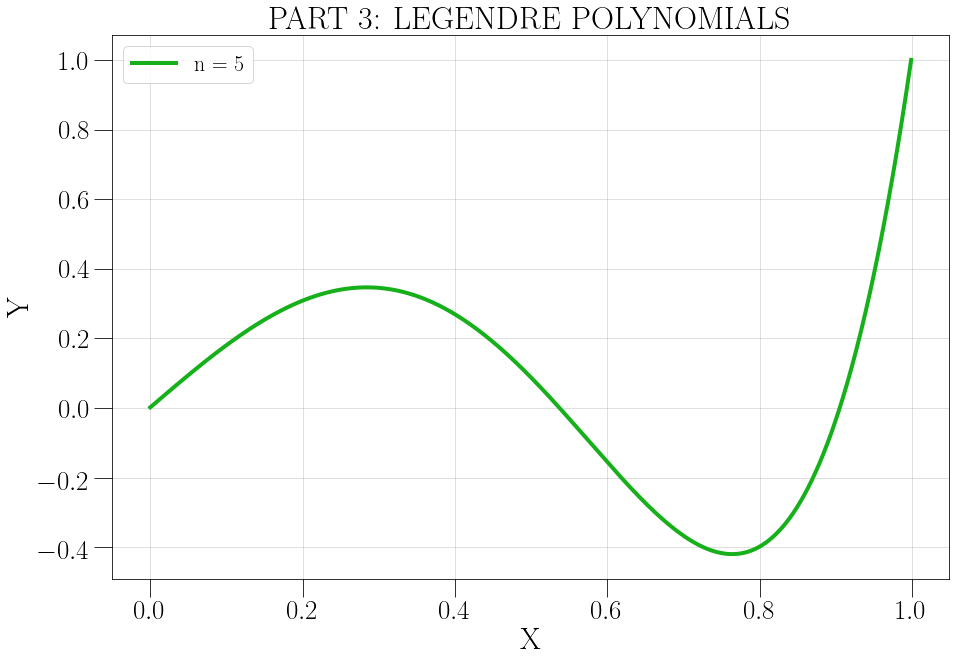

In [85]:
fig2 = plt.figure(figsize = (15,10))
ax = fig2.add_subplot(1,1,1)

ax.grid(b=True, which='both')
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_title(r'PART 3: LEGENDRE POLYNOMIALS')

ax.plot(xa,yp,color="xkcd:green",linestyle='-',linewidth=4,alpha=1.0,label="n = 5")
ax.legend(loc='upper left')